In [45]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
from sklearn import model_selection as ms
from sklearn import linear_model as lm
from yellowbrick.regressor import ResidualsPlot

In [2]:
df = pd.read_csv('../data/merged_data.csv')
df.columns = [x.lower() for x in df.columns]
df.drop(set(df[df["hivdiagnoses"] == 0].index), axis=0, inplace=True)
X = df[['hivdiagnoses', 'hivprevalence', 'plhiv', 'population']]
y = np.log(df['hivincidence'])

In [3]:
X_train, X_test, y_train, y_test = ms.train_test_split(
        X, y, test_size =.25,random_state=12345)

In [4]:
model = lm.Lasso(alpha = .01,fit_intercept=True,tol=10)
model.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=10, warm_start=False)

In [5]:
pred = model.predict(X_train)
r = sp.stats.linregress(pred,y_train)

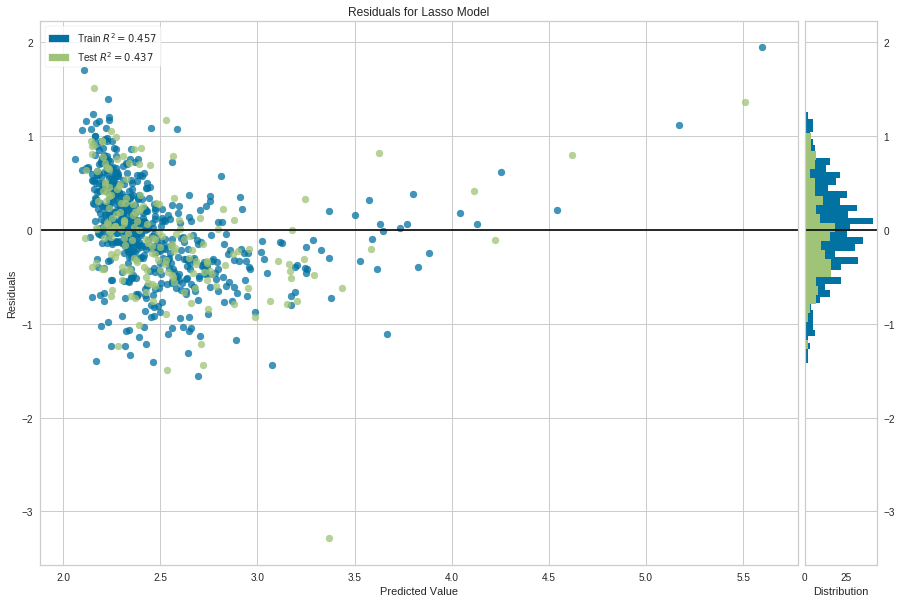

LinregressResult(slope=1.295685417320078, intercept=-0.73528385748862, rvalue=0.6944206555217749, pvalue=8.560451669824474e-82, stderr=0.056837171474002135)


In [6]:
visualizer = ResidualsPlot(model,size=(1080, 720))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()
print(r)

In [7]:
run nick_python.py

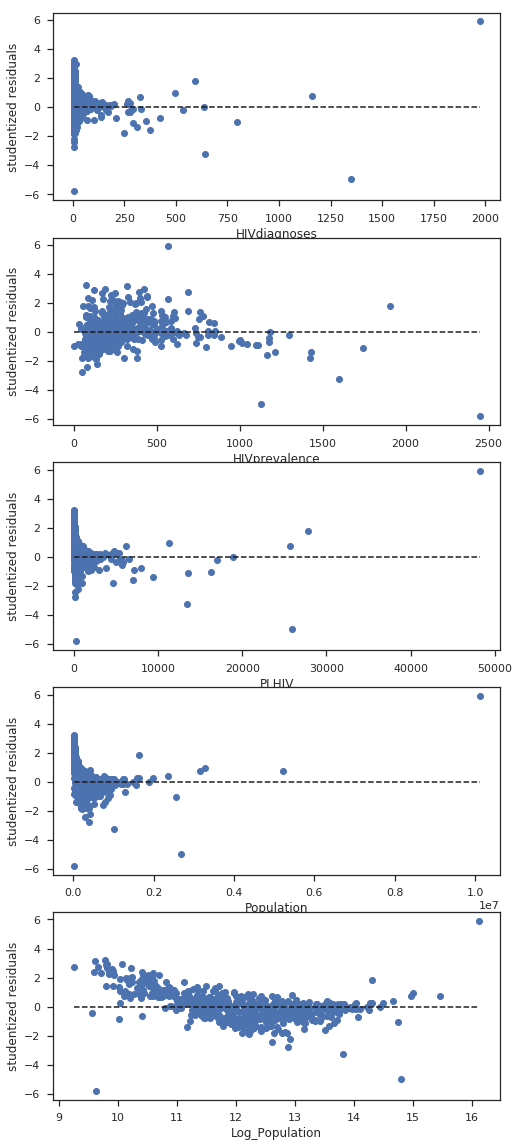

In [8]:
plot_residuals(X_train_full, X_holdout, y_train_full, y_holdout)

0.772782847135251


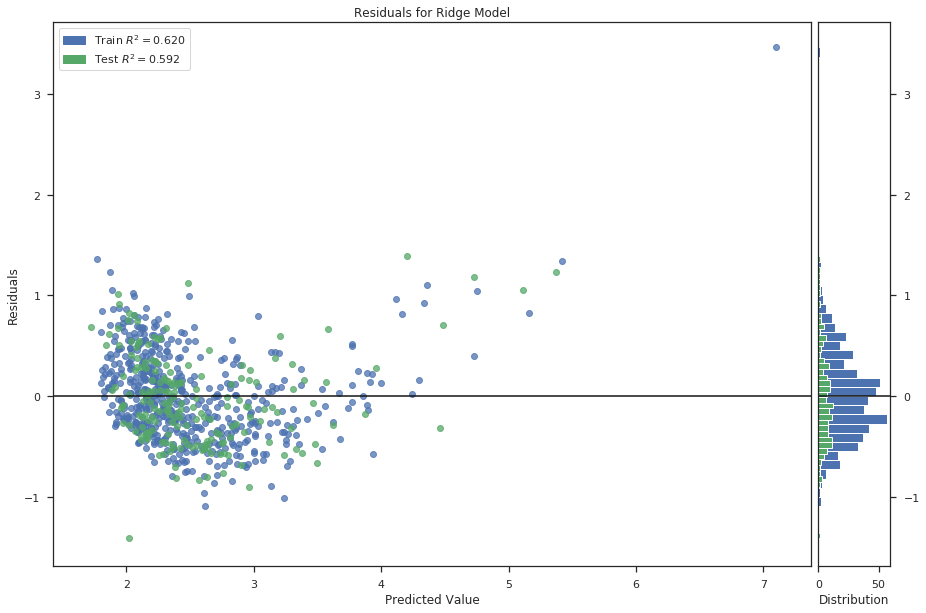

Training scores: [0.67640541 0.60636431 0.60154465 0.63252291 0.602413   0.60759592
 0.57976537 0.61474101 0.62158276 0.6017408 ] 

Testing scores: [-2.71169132  0.53724252  0.5865858   0.21607282  0.64599504  0.59083489
  0.72688696  0.50455115  0.37989039  0.65114672]


In [9]:
visualize_pred_residuals(X_train_full, X_holdout, y_train_full, y_holdout)

In [10]:
X_train_full = sm.add_constant(X_train_full)
model = sm.OLS(y_train_full, X_train_full)
results = model.fit()
results.summary()

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     180.3
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          1.28e-113
Time:                        22:19:01   Log-Likelihood:                -338.36
No. Observations:                 559   AIC:                             688.7
Df Residuals:                     553   BIC:                             714.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.0987      0.263     19.364      0.000       4.581       5.616
HIVdiagnoses       0.0051      0.001      8.513      0.000       0.004       0.006
HIVprevalence      0.0019    9.4e-05     20.208      0.000       0.002       0.002
PLHIV             -0.0002   2.39e-05     -8.372      0.000      -0.000      -0.000
Population      1.878e-07   8.64e-08      2.173      0.030     1.8e-08    3.58e-07
Log_Population    -0.2709      0.023    -12.038      0.000      -0.315      -0.227
==============================================================================
Omnibus:                      161.592   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.751
Skew:                          -1.140   Prob(JB):                    2.34e-204
Kurtosis:                       8.922   Cond. No.                     9.69e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X_men_pop = X.copy()
X_men_pop["ADULTMEN"] = np.log(hiv_data["ADULTMEN"])
X_train_men, X_holdout_men, y_train_men, y_holdout_men = train_test_split(X_men_pop, y)

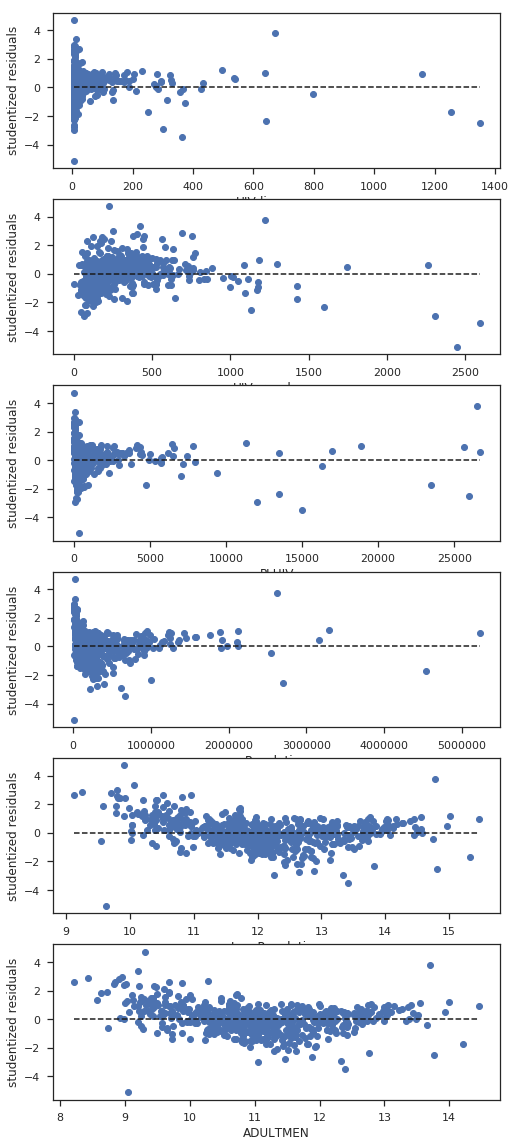

In [12]:
plot_residuals(X_train_men, X_holdout_men, y_train_men, y_holdout_men)

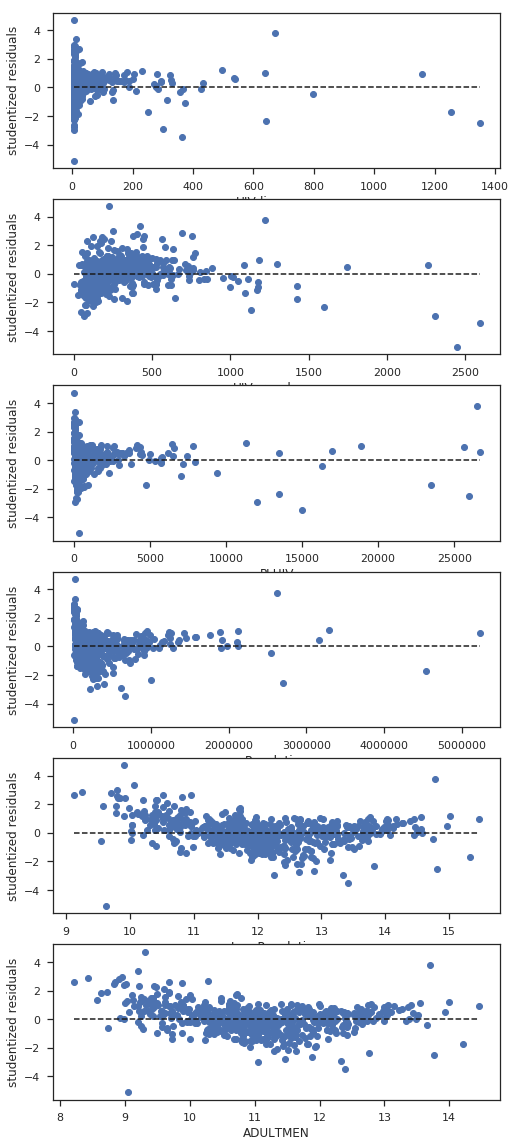

In [13]:
plot_residuals(X_train_men, X_holdout_men, y_train_men, y_holdout_men)

In [14]:
X_train_men = sm.add_constant(X_train_men)
model = sm.OLS(y_train_men, X_train_men)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     161.6
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          4.61e-118
Time:                        22:19:03   Log-Likelihood:                -337.32
No. Observations:                 559   AIC:                             688.6
Df Residuals:                     552   BIC:                             718.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.8029      0.352     13.626      0.000       4.111       5.495
HIVdiagnoses       0.0040      0.001      7.583      0.000       0.003       0.005
HIVprevalence      0.0019   9.22e-05     20.230      0.000       0.002       0.002
PLHIV             -0.0002   2.04e-05     -8.666      0.000      -0.000      -0.000
Population      5.089e-07   1.01e-07      5.049      0.000    3.11e-07    7.07e-07
Log_Population     0.9861      0.268      3.678      0.000       0.460       1.513
ADULTMEN          -1.3537      0.276     -4.898      0.000      -1.897      -0.811
==============================================================================
Omnibus:                       91.675   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.480
Skew:                          -0.787   Prob(JB):                     5.01e-59
Kurtosis:                       6.008   Cond. No.                     1.48e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X_poverty = X.copy()
X_poverty["poverty_rate"] = np.log(hiv_data["poverty_rate"])
X_poverty.drop("Log_Population", axis=1, inplace=True)
X_train_poverty, X_holdout_poverty, y_train_poverty, y_holdout_poverty = train_test_split(X_poverty, y)

0.7508256647069944


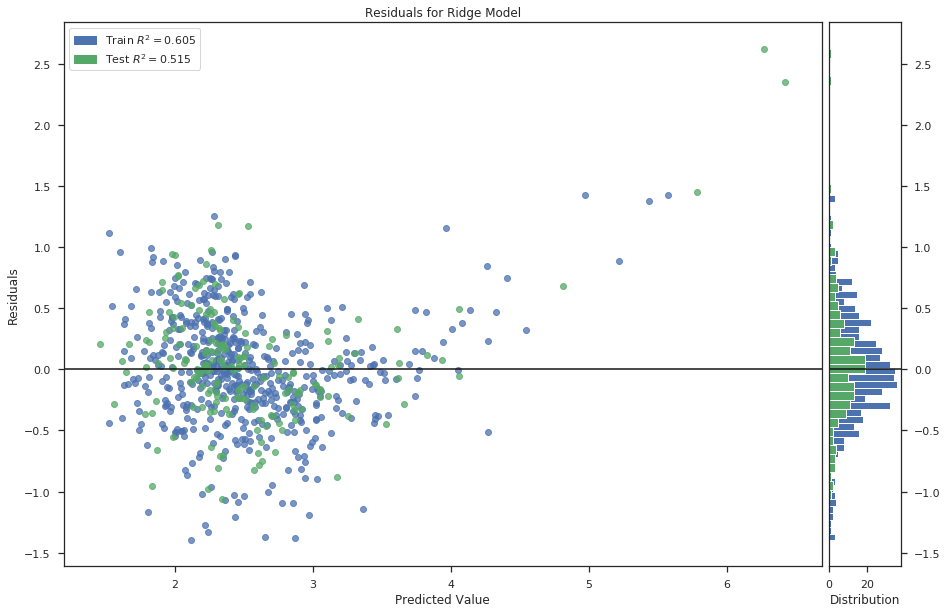

Training scores: [0.58372239 0.55545892 0.55988207 0.56304052 0.58796829 0.59388201
 0.59876086 0.59935214 0.63413194 0.59477254] 

Testing scores: [ 0.54229668  0.69901285  0.68891274  0.77337658  0.48082934  0.41537494
  0.03751834  0.4104044  -1.15396468  0.19463502]


In [16]:
visualize_pred_residuals(X_train_poverty, X_holdout_poverty, y_train_poverty, y_holdout_poverty)

In [17]:
X_train_poverty = sm.add_constant(X_train_poverty)
model = sm.OLS(y_train_poverty, X_train_poverty)
results = model.fit()
results.summary()

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     169.4
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          4.90e-109
Time:                        22:19:04   Log-Likelihood:                -350.22
No. Observations:                 559   AIC:                             712.4
Df Residuals:                     553   BIC:                             738.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7640      0.145      5.279      0.000       0.480       1.048
HIVdiagnoses      0.0062      0.001      9.174      0.000       0.005       0.007
HIVprevalence     0.0017      0.000     17.030      0.000       0.002       0.002
PLHIV            -0.0002   1.96e-05    -10.303      0.000      -0.000      -0.000
Population    -2.728e-07   9.44e-08     -2.889      0.004   -4.58e-07   -8.73e-08
poverty_rate      0.4565      0.052      8.752      0.000       0.354       0.559
==============================================================================
Omnibus:                        7.304   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               10.253
Skew:                           0.077   Prob(JB):                      0.00594
Kurtosis:                       3.645   Cond. No.                     5.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
import statsmodels.api as sm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp
import numpy as np
%matplotlib inline
from statsmodels.stats.diagnostic import HetGoldfeldQuandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn as sk
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection as ms
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression

In [19]:
def read_data():
    df = pd.read_csv("../data/merged_data.csv")
    df.fillna(0, inplace = True)
    df.drop(set(df[df["HIVdiagnoses"] == 0].index), axis=0, inplace=True)
    cols = ["HIVdiagnoses", "HIVprevalence", "PLHIV", "Population"]
    X = pd.DataFrame(index=df["ADULTMEN"].index, columns=cols)
    for col in cols:
        X[col] = df[col]
    y = np.array(df["HIVincidence"])
    return df, X, y

In [20]:
def read_data_new():
    df = pd.read_csv("../data/merged_data.csv")
    df.fillna(0, inplace = True)
    df.drop(set(df[df["HIVdiagnoses"] == 0].index), axis=0, inplace=True)
    cols = ['HIVdiagnoses', 'HIVprevalence', 'MSM12MTH', 'MSM5YEAR']
    X = pd.DataFrame(index=df["ADULTMEN"].index, columns=cols)
    for col in cols:
        X[col] = df[col]
    y = np.array(df["HIVincidence"])
    return df, X, y

In [21]:
hiv_data, X, y = read_data()
hiv_data, Z, y = read_data_new()

In [22]:
y_logged = np.log(y)
model = sm.OLS(y_logged, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     800.0
Date:                Fri, 07 Jun 2019   Prob (F-statistic):          1.62e-267
Time:                        22:19:04   Log-Likelihood:                -1155.8
No. Observations:                 747   AIC:                             2320.
Df Residuals:                     743   BIC:                             2338.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
HIVdiagnoses      0.0032      0.001      2.766      0.006       0.001       0.006
HIVprevalence     0.0058      0.000     47.409      0.000       0.006       0.006
PLHIV            -0.0006   4.01e-05    -14.324      0.000      -0.001      -0.000
Population     2.118e-06   1.33e-07     15.883      0.000    1.86e-06    2.38e-06
==============================================================================
Omnibus:                      493.502   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13985.797
Skew:                          -2.514   Prob(JB):                         0.00
Kurtosis:                      23.593   Cond. No.                     1.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
Z['MSM5YEAR'] = np.log(Z['MSM5YEAR'].values)

In [52]:
model = sm.OLS(y_logged, Z)
results2 = model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2085.
Date:                Fri, 07 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:41:50   Log-Likelihood:                -844.14
No. Observations:                 747   AIC:                             1696.
Df Residuals:                     743   BIC:                             1715.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
HIVdiagnoses      0.0009      0.000      1.839      0.066   -6.15e-05       0.002
HIVprevalence     0.0020      0.000     18.818      0.000       0.002       0.002
MSM12MTH      -3.957e-05   6.86e-06     -5.771      0.000    -5.3e-05   -2.61e-05
MSM5YEAR          0.2580      0.006     45.253      0.000       0.247       0.269
==============================================================================
Omnibus:                       50.493   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.728
Skew:                           0.294   Prob(JB):                     1.38e-32
Kurtosis:                       5.090   Cond. No.                     2.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
params = results.params
params

HIVdiagnoses     0.003220
HIVprevalence    0.005788
PLHIV           -0.000575
Population       0.000002
dtype: float64

In [25]:
params2 = results2.params
params2

HIVdiagnoses    -0.004028
HIVprevalence    0.005379
MSM12MTH         0.174860
MSM5YEAR        -0.113082
dtype: float64

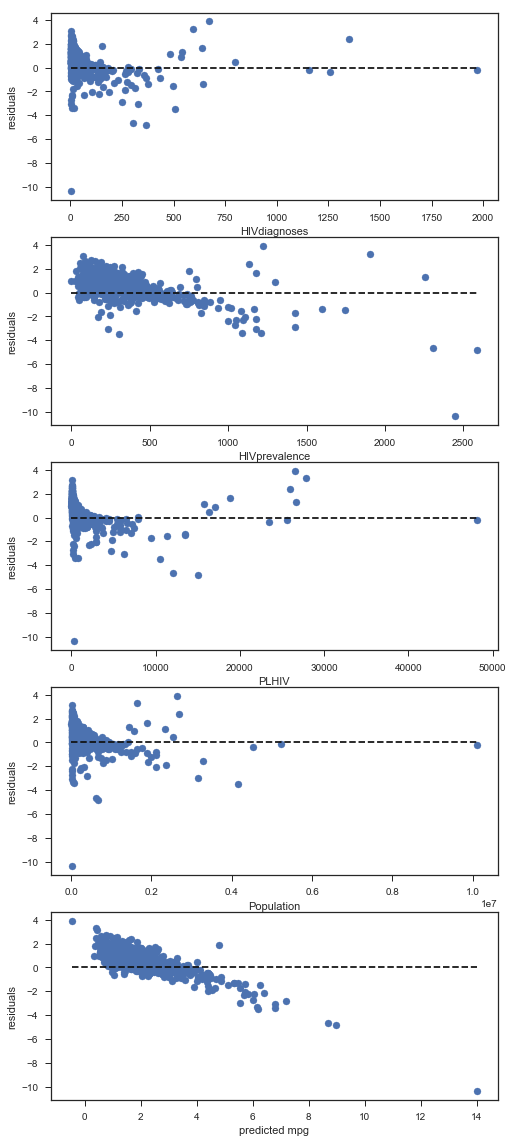

In [53]:
fig, axs = plt.subplots(5,1, figsize=(8,20))

axs[0].scatter(X['HIVdiagnoses'], results.resid)
axs[0].hlines(0,
              X['HIVdiagnoses'].min(), 
              X['HIVdiagnoses'].max(), 
              'k', linestyle='dashed')
axs[0].set_xlabel('HIVdiagnoses')
axs[0].set_ylabel('residuals');

axs[1].scatter(X['HIVprevalence'], results.resid)
axs[1].hlines(0,
              X['HIVprevalence'].min(), 
              X['HIVprevalence'].max(), 
              'k', linestyle='dashed')
axs[1].set_xlabel('HIVprevalence')
axs[1].set_ylabel('residuals');

axs[2].scatter(X['PLHIV'], results.resid)
axs[2].hlines(0,
              X['PLHIV'].min(), 
              X['PLHIV'].max(), 
              'k', linestyle='dashed')
axs[2].set_xlabel('PLHIV')
axs[2].set_ylabel('residuals');

axs[3].scatter(X['Population'], results.resid)
axs[3].hlines(0,
              X['Population'].min(), 
              X['Population'].max(), 
              'k', linestyle='dashed')
axs[3].set_xlabel('Population')
axs[3].set_ylabel('residuals');


axs[4].scatter(results.fittedvalues, results.resid)
axs[4].hlines(0,
              results.fittedvalues.min(), 
              results.fittedvalues.max(),
              'k', linestyle='dashed')
axs[4].set_xlabel('predicted mpg')
axs[4].set_ylabel('residuals');

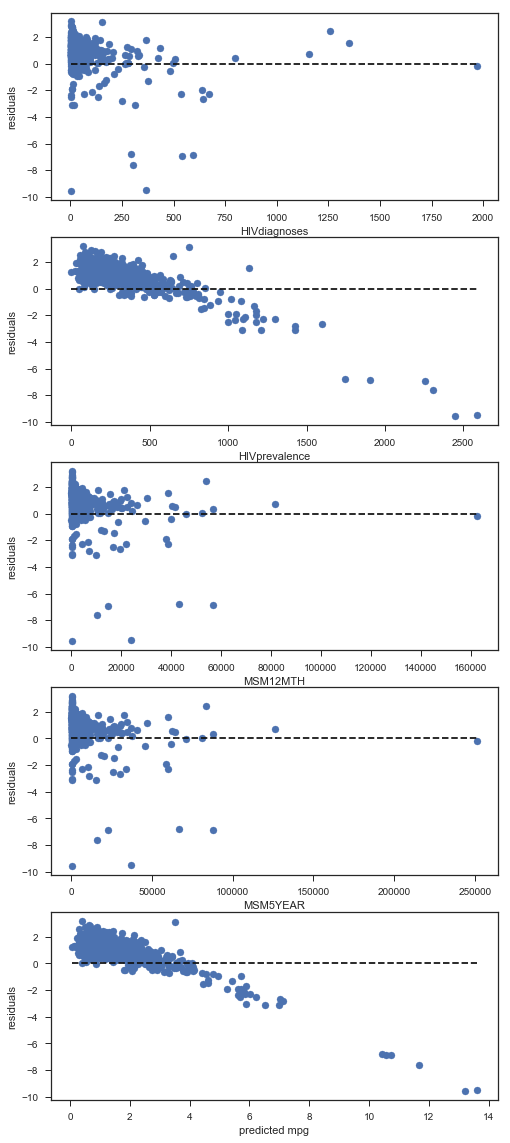

In [48]:
fig, axs = plt.subplots(5,1, figsize=(8,20))

axs[0].scatter(Z['HIVdiagnoses'], results2.resid)
axs[0].hlines(0,
              Z['HIVdiagnoses'].min(), 
              Z['HIVdiagnoses'].max(), 
              'k', linestyle='dashed')
axs[0].set_xlabel('HIVdiagnoses')
axs[0].set_ylabel('residuals');

axs[1].scatter(Z['HIVprevalence'], results2.resid)
axs[1].hlines(0,
              Z['HIVprevalence'].min(), 
              Z['HIVprevalence'].max(), 
              'k', linestyle='dashed')
axs[1].set_xlabel('HIVprevalence')
axs[1].set_ylabel('residuals');

axs[2].scatter(Z['MSM12MTH'], results2.resid)
axs[2].hlines(0,
              Z['MSM12MTH'].min(), 
              Z['MSM12MTH'].max(), 
              'k', linestyle='dashed')
axs[2].set_xlabel('MSM12MTH')
axs[2].set_ylabel('residuals');

axs[3].scatter(Z['MSM5YEAR'], results2.resid)
axs[3].hlines(0,
              Z['MSM5YEAR'].min(), 
              Z['MSM5YEAR'].max(), 
              'k', linestyle='dashed')
axs[3].set_xlabel('MSM5YEAR')
axs[3].set_ylabel('residuals');


axs[4].scatter(results2.fittedvalues, results2.resid)
axs[4].hlines(0,
              results2.fittedvalues.min(), 
              results2.fittedvalues.max(),
              'k', linestyle='dashed')
axs[4].set_xlabel('predicted mpg')
axs[4].set_ylabel('residuals');

In [28]:
f_statistic, p_value, _ = sm.stats.diagnostic.het_goldfeldquandt(y_logged, X, idx=1, alternative='two-sided')
print(p_value)

6.563169455896138e-55


In [29]:
f_statistic2, p_value2, _ = sm.stats.diagnostic.het_goldfeldquandt(y_logged, Z, idx=1, alternative='two-sided')
print(p_value2)

6.573399632977522e-53


In [30]:
stud_resids = results.outlier_test()['student_resid']

In [31]:
stud_resids2 = results2.outlier_test()['student_resid']

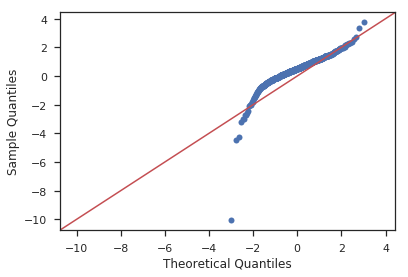

In [32]:
ax = sm.graphics.qqplot(stud_resids, line='45')

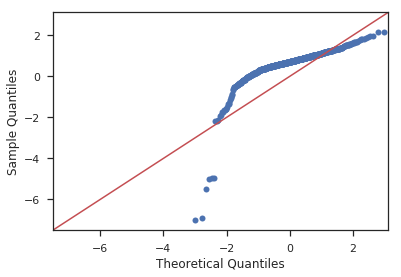

In [33]:
ax = sm.graphics.qqplot(stud_resids2, line='45')

In [34]:
X_train, X_test, y_train, y_test = ms.train_test_split(X.values, y_logged, test_size =.25)
model = sm.OLS(y_train, X_train)
res = model.fit()
y_pred = res.predict(X_test)

In [35]:
r = sp.stats.linregress(y_pred,y_test)
r[2]

0.6673082108320001

In [36]:
X_train2, X_test2, y_train2, y_test2 = ms.train_test_split(Z.values, y_logged, test_size =.25)
model2 = sm.OLS(y_train2, X_train2)
res2 = model.fit()
y_pred2 = res.predict(X_test2)
r2 = sp.stats.linregress(y_pred2,y_test2)
r2[2]

0.017030949355805614

In [37]:
reg = LinearRegression(fit_intercept=True).fit(X, y_logged)

In [38]:
cvr = ms.cross_validate(reg,X,y,cv=20,return_train_score=True)

In [39]:
print(cvr)

{'fit_time': array([0.00250268, 0.00216222, 0.00231457, 0.00197697, 0.00183415,
       0.00184488, 0.00180459, 0.00184464, 0.0020268 , 0.00182104,
       0.0017519 , 0.00111961, 0.00115728, 0.00108695, 0.00120997,
       0.00109982, 0.00109291, 0.00109363, 0.00112081, 0.00111699]), 'score_time': array([0.00117159, 0.00115299, 0.00122714, 0.00103211, 0.00098825,
       0.00101876, 0.00098205, 0.00114775, 0.00111628, 0.00098944,
       0.00113225, 0.00061035, 0.00061417, 0.00062323, 0.0006156 ,
       0.00061345, 0.00061202, 0.00062799, 0.00063229, 0.00062919]), 'test_score': array([  0.53469374,  -1.88324401,   0.78079022,  -2.91521016,
        -0.03593605,   0.83836347,   0.07801777,   0.65245304,
         0.71191586,   0.67121828,   0.64654559, -13.93963266,
         0.51588385,   0.67655855,   0.80224397,   0.73629144,
         0.35830783,  -0.31796764,   0.38828206,   0.67563274]), 'train_score': array([0.20136776, 0.2080175 , 0.2006621 , 0.21944194, 0.20221557,
       0.20167535, 0

In [40]:
reg2 = LinearRegression(fit_intercept=True).fit(Z, y_logged)
cvr2 = ms.cross_validate(reg,Z,y,cv=20,return_train_score=True)
print(cvr2)

{'fit_time': array([0.00184655, 0.0016892 , 0.00157452, 0.00153327, 0.00169277,
       0.00143051, 0.00133801, 0.00131774, 0.00133395, 0.00136638,
       0.00135875, 0.00150371, 0.00137019, 0.00133181, 0.00131154,
       0.00133777, 0.00132298, 0.00132012, 0.00131655, 0.00130963]), 'score_time': array([0.00077629, 0.00087118, 0.00075483, 0.00079727, 0.00081825,
       0.00072312, 0.00072145, 0.00070977, 0.00070953, 0.00071406,
       0.00072193, 0.00072598, 0.0007093 , 0.00070548, 0.00071335,
       0.00070953, 0.00070548, 0.0007081 , 0.00070357, 0.00070596]), 'test_score': array([ 0.34759934, -3.30567868,  0.44007354, -0.16570996,  0.21458086,
        0.75332802,  0.03964782,  0.63497102,  0.45026822,  0.52191422,
        0.51354488, -1.03925689,  0.46122465,  0.46222281,  0.061924  ,
        0.64042822,  0.49644601,  0.20568976,  0.28929547,  0.52541193]), 'train_score': array([0.14385525, 0.15073693, 0.14309135, 0.14711522, 0.1378445 ,
       0.14261961, 0.52768093, 0.13783348, 0.14

In [41]:
from yellowbrick.regressor import ResidualsPlot

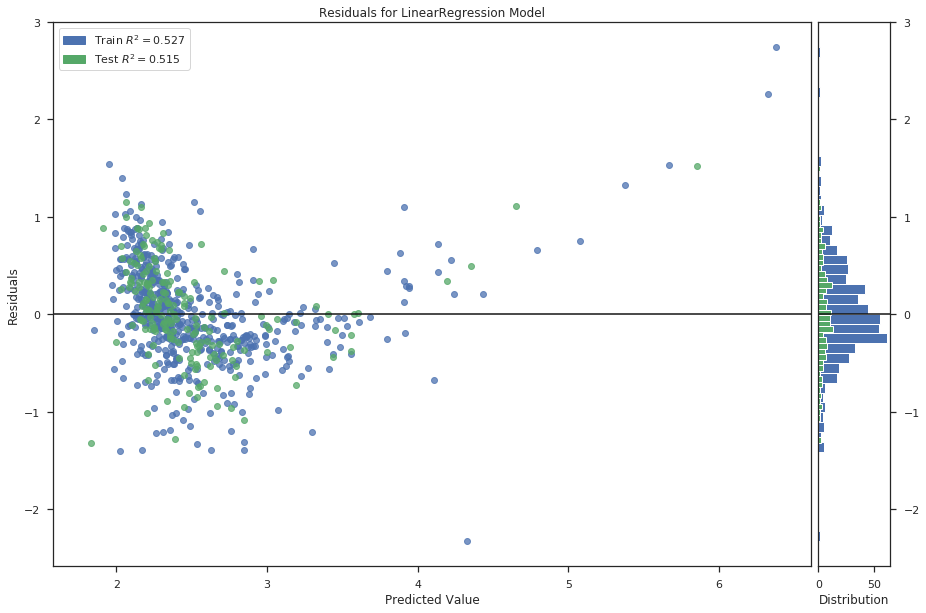

In [43]:
visualizer = ResidualsPlot(reg,size=(1080, 720))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof() 

In [ ]:
visualizer2 = ResidualsPlot(reg2)
visualizer2.fit(X_train2, y_train2)
visualizer2.score(X_test2, y_test2)
visualizer2.poof() 